In [1]:
# x = []
# heapq.heappush(x, (3,4,5))
# heapq.heappush(x, (2,4,5))
# heapq.heappush(x, (2,3,5))
# print(x)
# print(heapq.heappop(x))
# print(heapq.heappop(x))
# print(x)

In [2]:
import numpy as np
import pandas as pd

## Question-1 Greedy A-star algorithm

Assumptions:
1. All cells are unblocked, until it observes them to be blocked.
2. All path planning is done with the current state of knowledge of the gridworld under this freespace assumption

Data Structures:
1. m1 (2D array): represents the full knowledge of the gridworld. Contains all blocked and unblocked cells present.
2. m2 (2D array): represents the current knowledge of the agent. Gets updated according to the field of view of the m1 array
3. pq (Priority Queue): will store the visited cells and will return them in increasing order of priority
4. dirx[], diry[] : will store values to calculate the neighbouring nodes in N,S,E,W direction.
5. visited (dictionary) : will store the status of visited and non-visited for each vertices in the gridworld.

Pseudocode:
1. Start with S.
2. Plan a path from S to G using the Manhattan distance heuristic.
3. Start traversing on the path until a) you reach the goal or b) you get blocked in that path.
4. If you reach the goal, terminate the program and find the path.
5. If you see a block, then start from step 1 with S as the most recent unblocked cell

Input:
1. n is the dimension of gridworld (nxn).
2. s is the string of length nxn that denotes the state of each cell in the grid world.
3. If s[i] is '.', then the cell is unblocked; If s[i] is 'x', then the cell is blocked; 
4. If s[i] is 'P', then the cell is in the path that the agent follows.
5. If s[i] is 'S', then the cell is the starting position.
6. If s[i] is 'G', then the cell is the goal position.

In [ ]:
m = int(input("Give number of rows: ")) ## denotes the dimension of mxn matrix
n = int(input("Give number of columns: ")) ## denotes the dimension of mxn matrix
sx = int(input("Give the x coordinate of start cell: ")) ## denotes the x-coordinate of the start cell
sy = int(input("Give the y coordinate of start cell: ")) ## denotes the y-oordinate of the start cell
tx = int(input("Give the x coordinate of target cell: ")) ## denotes the x-coordinate of the end cell
ty = int(input("Give the y coordinate of target cell: ")) ## denotes the y-coordinate of the end cell
s = input("Give the string for the grid: ") ## Denotes the actual gri of the mxn matrix
i = 0
grid = [] ## matrix that contains full knowledge of gridworld
while(i<m*n):
    grid.append(list(s[i:i+n]))
    i = i + n
grid = np.array(grid)
# agent_grid = np.full((m,n),'.') ## agent_grid denotes the current knowledge of the agent
print(grid)
# print(agent_grid)

In [ ]:
# def manhattan_distance(x,y):
#     return abs(x[0]-y[0])+abs(x[1]-y[1])

In [ ]:
# def get_priority(x):
#     return manhattan_distance(x,goal)

In [ ]:
# from queue import PriorityQueue
# dirx = [-1, 1, 0, 0]
# diry = [0, 0, 1, -1]
# start = (get_priority(start), 0, 0)
# target = (n-1, n-1)

In [ ]:
# dirx = [-1, 1, 0, 0]
# diry = [0, 0, 1, -1]
# def a_star(source):
#     visited = np.zeros((n,n),dtype = np.int8)
#     curr = (get_priority(source), source[0], source[1])
#     PriorityQueue Open = PriorityQueue();
#     planned_path = []
#     Open.put(curr)
#     visited[curr[1]][curr[2]] = 1;
#     while(!Open.empty()):
#         curr = Open.get()
#         planned_path.append((curr[1],curr[2]))
#         if( curr[1] == target[0] and curr[2] == target[1]):
#             return planned_path
#         for i in np.arange(4):
#             childx = curr[1] + dirx[i]
#             childy = curr[2] + diry[i]
#             if(childx>=0 and childx<n and childy>=0 and childy<n and !visited[childx][childy] and agent_grid[childx][childy]!='X'):
#                 visited[childx][childy] = 1
#                 child = (get_priority(child),childx,childy)
#                 Open.put(child)
    

# Data Structures for this project:

Sorted Set:
http://www.grantjenks.com/docs/sortedcontainers/sortedset.html

In [ ]:
# x = {(0,0):0,(0,1):10,(0,2):9}

In [ ]:
# from sortedcontainers import SortedSet
# def func(t):
#     return x[t]
# y =SortedSet([(0,0),(0,1),(0,2)], key = func)
# print(y)


In [ ]:
# from sortedcontainers import SortedSet
# tt = SortedSet(['a','b','c','d','e'])
# tt
# tt.pop(0)

In [3]:
from sortedcontainers import SortedSet
from math import sqrt
## https://stackoverflow.com/questions/8875706/heapq-with-custom-compare-predicate/8875823
# Priority Queue with custom comparator
class MyPriorityQueue(object):
    # compare1 is the function that will return f(n)-> sort in ascending order of f(n)
    # compare2 is the function that will return g(n)-> sort in ascending order of g(n) if f(n) is same
    def __init__(self, current_heuristic, target):
        self.current_heuristic = current_heuristic
#         self._data = []
        self._data = SortedSet()
        self.target = target
        self.g = dict()
        self.h = dict()
    def __len__(self):
        return len(self._data)
    #### It is required to update g(n) and h(n) before pushing the node into the priority queue
    def push(self, item):
        node = (self.calculate_priority(item), self.get_heuristic(item), item)
        self._data.add(node)
#         heapq.heappush(self._data, (self.calculate_priority(item), self.get_heuristic(item), item))
    def pop(self):
        node = self._data.pop(0)[2]
        return node
#         return heapq.heappop(self._data)[2]
    def manhattan_distance(self, x, y): # Manhattan Distance -> heuristic = |x1-x2| + |y1-y2|
        return abs(x[0]-y[0])+abs(x[1]-y[1])
    def euclidean_distance(self, x, y): # Euclidean Distance -> heuristic = sqrt( (x1-x2)**2 + (y1-y2)**2 )
        return sqrt( (x[0]-x[1])**2 + (y[0]-y[1])**2 )
    def chebyshev_distance(self, x, y): # Chebyshev Distance -> heuristic = max(|x1-x2|, |y1-y2|)
        return max(abs(x[0]-x[1]), abs(y[0]-y[1]))
    def get_heuristic(self, x):  # returns the value of heuristic based on the heuristic function
        measure = self.current_heuristic
        if measure == 'm': # if h is manhattan
            self.h[x] = self.manhattan_distance(x, self.target)
        elif measure == 'e': # if h is euclidean
            self.h[x] = self.euclidean_distance(x, self.target)
        elif measure == 'c': # if c is chebyshev
            self.h[x] = self.chebyshev_distance(x, self.target)
        return self.h[x]
    def calculate_priority(self, x): # calculates priority for each cell - distance from cell to target
#         print("*******x: ",x)
#         print("self.g: ",self.g)
#         print("g: ",self.g[x])
        return self.g[x] + self.get_heuristic(x)

class GridWorld:
    def __init__(self, grid, start, target, n, m, agent_grid = None ):
        self.n = n # denotes the number of rows
        self.m = m # denotes the number of columns
        self.start = start # denotes the start coordinate of the grid
        self.target = target # denotes the target coordinate of the grid
        self.trajectory = [] # denotes the trajectory of the agent in the grid
        self.grid = grid # denotes the full knowledge of the grid
        if agent_grid is None:
            self.agent_grid = np.full((n,n),'.')
        else:
            self.agent_grid = agent_grid
#         self.agent_grid =  (agent_grid or np.full((n,n),'.')) # denotes the current knowledge of the grid
        self.avg_num_cells_processed = 0
#         self.g = dict() # denotes the g value -> distance from source to current node
#         self.h = dict() # denotes the h value -> estimation of distance from current node to the target
#     def manhattan_distance(self, x, y): # Manhattan Distance -> heuristic = |x1-x2| + |y1-y2|
#         return abs(x[0]-y[0])+abs(x[1]-y[1])
#     def euclidean_distance(self, x, y): # Euclidean Distance -> heuristic = sqrt( (x1-x2)**2 + (y1-y2)**2 )
#         return sqrt( (x[0]-x[1])**2 + (y[0]-y[1])**2 )
#     def chebyshev_distance(self, x, y): # Chebyshev Distance -> heuristic = max(|x1-x2|, |y1-y2|)
#         return max(abs([0]-x[1]), abs(y[0]-y[1]))
#     def get_heuristic(self, x, measure):  # returns the value of heuristic based on the heuristic function
#         if measure == 'm': # if h is manhattan
#             self.h[x] = sel.manhattan(self, x, y)
#         elif measure == 'e': # if h is euclidean
#             self.h[x] = self.eucliden_distance(self, x, y)
#         elif measure == 'c': # if c is chebyshev
#             self.h[x] = self.chebyshev_distance(self, x, y)
#         return self.h[x]
#     def calculate_priority(self, x, h, g): # calculates priority for each cell - distance from cell to target
# #         print("g: ",self.g)
# #         print("x: ",x)
# #         print("self.g[x]: ",self.g[x])
#         return g + self.get_heuristic(self, x, self.target, h)
    def a_star(self, source, current_heuristic = 'm'):
        dirx = [-1, 1, 0, 0] ## calculates the neighbours of the current node
        diry = [0, 0, 1, -1] ## calculates the neighbours of the current node
#         print("source: ",source)
        visited = set() ## contains the nodes that have already been added in priority queue
        closed_list = set() ## contains the nodes that have been popped from priority queue
        #self.g = dict()
        open_list = MyPriorityQueue(current_heuristic, self.target) ## stores the visited nodes and pops it out according to it's priority
        planned_path = [] ## Stores the path that the agent has planned according to it's current knowledge
        open_list.g[source]=0
        open_list.calculate_priority( source)
        open_list.push( source) ## This function runs in O(logn)
        visited.add(source)#visited[source] = 1
        parent = {} ## stores the parent of each node that is visited
        parent[source] = None
        while(len(open_list)>0):
            curr = open_list.pop()
            if(curr in closed_list):
                continue
            self.avg_num_cells_processed = self.avg_num_cells_processed + 1
            closed_list.add(curr)
            if(curr[0] == self.target[0] and curr[1] == self.target[1]):
                break
            for i in np.arange(4):
                childx = curr[0] + dirx[i]
                childy = curr[1] + diry[i]
                child = (childx, childy)
                if(childx>=0 and childx<m and childy>=0 and childy<n and (child not in closed_list) and self.agent_grid[childx][childy]!='X'):
                    if(child not in visited):
                        visited.add(child)
                        parent[child] = curr
                        open_list.g[child] = open_list.g[curr]+1
                        open_list.calculate_priority(child)
                        open_list.push(child) #heapq.heappush(open_list, child)
                    else:
                        if open_list.g[curr]+1<open_list.g[child]:
                            parent[child] = curr
                            open_list._data.discard(child)
                            open_list.g[child] = open_list.g[curr]+1
                            open_list.calculate_priority(child)
                            open_list.push(child)
#                             temp = MyPriorityQueue(current_heuristic, self.target)
#                             tempcurr = open_list.pop()
#                             while( len(open_list)>0 and tempcurr != child):
#                                 temp.g[tempcurr] = open_list.g[tempcurr]
#                                 temp.calculate_priority(tempcurr)
#                                 temp.push(tempcurr)
#                                 tempcurr = open_list.pop()
#                             open_list.g[child] = open_list.g[curr]+1
#                             open_list.calculate_priority(child)
#                             open_list.push(child)
#                             while( len(temp)>0 ):
#                                 tempcurr = temp.pop()
#                                 open_list.push(tempcurr)
        if(self.target not in visited):
            return []
        curr = self.target
#         print("$$$$$$$source: ",source)
#         print("agent_grid: \n",self.agent_grid)
#         print("parent: ",parent)
        while(curr != source):
#             print("curr: ",curr,"parent: ",parent[curr])
            planned_path.append(curr)
            curr = parent[curr]
        planned_path.append(source)
        return planned_path[::-1]
    
    
    def check_planned_path(self, planned_path):
        dirx = [-1, 1, 0, 0]
        diry = [0, 0, -1, 1]
        n = len(planned_path)
        traversed_path = []
        for i in np.arange(n):
            currx = planned_path[i][0]
            curry = planned_path[i][1]
            if(grid[currx][curry] == 'X'):
                break
            traversed_path.append((currx,curry))
            for i in np.arange(4):
                childx = currx + dirx[i]
                childy = curry + diry[i]
                if(childx>=0 and childx<self.m and childy>=0 and childy<self.n):
                    self.agent_grid[childx][childy] = self.grid[childx][childy]
        return traversed_path
    
    ## This is the function that computes the path that repeated a-star traverses
    def compute_path(self):
        path = []
        curr = self.start
        while(curr != self.target):
            planned_path = self.a_star(curr)
            if( len(planned_path) == 0 ):
                return []
            traversed_path = self.check_planned_path(planned_path)
            n = len(traversed_path)
            path.append(traversed_path)
            if(traversed_path[n-1] == self.target):
                break
            curr = traversed_path[n-1]
        # self.combine_path(path)
        return path
                        
                    
        
        

In [81]:
grid

array([['.', '.', '.', ..., 'X', '.', 'X'],
       ['X', '.', '.', ..., '.', '.', 'X'],
       ['.', '.', 'X', ..., '.', '.', '.'],
       ...,
       ['.', 'X', '.', ..., '.', '.', '.'],
       ['X', '.', '.', ..., 'X', 'X', '.'],
       ['X', 'X', 'X', ..., '.', '.', '.']], dtype='<U1')

In [8]:
start = (sx, sy)
target = (tx, ty)
gw = GridWorld(grid, start, target, n, m)
ans = gw.compute_path()
print(ans)

NameError: name 'sx' is not defined

In [9]:
grid

array([['.', '.', '.', ..., '.', '.', '.'],
       ['.', '.', '.', ..., '.', '.', '.'],
       ['.', 'X', '.', ..., '.', '.', '.'],
       ...,
       ['.', '.', '.', ..., 'X', '.', '.'],
       ['.', '.', 'X', ..., 'X', '.', '.'],
       ['.', 'X', '.', ..., '.', '.', '.']], dtype='<U1')

In [10]:
gw = GridWorld(grid,(sx,sy),(tx,ty),n,m)
ans = gw.compute_path()

print(ans)

NameError: name 'sx' is not defined

In [11]:
# from queue import PriorityQueue
# ## input target and start
# class GridWorld:
#     def __init__(self, grid, start, target, n, m):
#         self.n= n
#         self.m = m
#         self.start = start
#         self.target = target
#         self.trajectory = []
#         self.grid = grid #Grid with full information about blocked and unblocked cells 
#         self.agent_grid = np.full((n,n),'.') #Grid that denotes current knowledge of the agent
#         self.visited = dict()
#     def manhattan_distance(self, x, y):
#         return abs(x[0]-y[0])+abs(x[1]-y[1])
#     def get_priority(self, x):
#         return self.manhattan_distance(x,self.target)
#     def a_star(self, source):
#         dirx = [-1, 1, 0, 0]
#         diry = [0, 0, 1, -1]
#         visited = np.zeros((self.m,self.n),dtype = np.int8)
#         curr = (self.get_priority(source), source[0], source[1])
#         Open = PriorityQueue()
#         planned_path = []
#         Open.put(curr)
#         visited[curr[1]][curr[2]] = 1;
#         parent = {}
#         while(Open.empty() == False):
#             curr = Open.get()
#             if( curr[1] == self.target[0] and curr[2] == self.target[1]):
#                 break
#             for i in np.arange(4):
#                 childx = curr[1] + dirx[i]
#                 childy = curr[2] + diry[i]
#                 if(childx>=0 and childx<m and childy>=0 and childy<n and visited[childx][childy]==0 and self.agent_grid[childx][childy]!='X'):
#                     visited[childx][childy] = 1
#                     parent[(childx,childy)] = (curr[1],curr[2])
#                     child = (self.get_priority((childx,childy)),childx,childy)
#                     Open.put(child)
#         if(visited[self.target[0]][self.target[1]]==0):
#             return[]
#         curr = self.target
#         while(curr!=source):
#             planned_path.append(curr)
#             curr = parent[curr]
#         planned_path.append(source)
#         return planned_path[::-1]
#     def check_planned_path(self, planned_path):
#         dirx = [-1, 1, 0, 0]
#         diry = [0, 0, 1, -1]
#         n = len(planned_path)
#         traversed_path = []
#         for i in np.arange(n):
#             currx = planned_path[i][0];
#             curry = planned_path[i][1];
#             if(grid[currx][curry] == 'X'):
#                 break
#             for i in np.arange(4):
#                 childx = currx + dirx[i]
#                 childy = curry + diry[i]
#                 if(childx>=0 and childx<self.m and childy>=0 and childy<self.n):
#                     self.agent_grid[childx][childy] = self.grid[childx][childy]
#             traversed_path.append((currx,curry))
#         return traversed_path
#     def combine_path(self, path):
#         self.trajectory = [self.start]
#         for traverse_list in path:
#             n = len(traverse_list)
#             print("***",traverse_list)
#             for idx in np.arange(n):
#                 if(idx == 0):
#                     continue
#                 self.trajectory.append(traverse_list[idx])
#     def compute_path(self):
#         path = []
#         curr = self.start
#         while(curr!=self.target):
#             planned_path = self.a_star(curr)
#             if( len(planned_path) == 0):
#                 print("No path available.")
#                 return []
#             traversed_path = self.check_planned_path(planned_path)
#             print("curr: ",curr)
#             print("planned_path: ")
#             print(planned_path)
#             print("traversed_path: ")
#             print(traversed_path)
#             n = len(traversed_path)
#             path.append(traversed_path)
#             if(traversed_path[n-1] == self.target):
#                 break
#             curr = traversed_path[n-1]
#         self.combine_path(path)
#         return path

### Question-4

"p" is the probaility whether the cells are blocked.
Need to plot the graph of p vs solvability of the grid.

Expectation: As p increases, solvability of the graph decreases since number of blocked cells increases. So, monotonic deceasing curve.

In [4]:
p_values = np.linspace(0,1,51)
print(p_values)
result_x = p_values[1:50]

[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54
 0.56 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82
 0.84 0.86 0.88 0.9  0.92 0.94 0.96 0.98 1.  ]


In [5]:
len(p_values)

51

In [6]:
from tqdm import tqdm

In [7]:
from tqdm import tqdm
cnt = 0
result_y = []
p_values = np.round(p_values,2)
result_x = p_values[1:50]
for p in tqdm(p_values):
    if p == 0 or  p== 1:
        continue
    with open('C:/Users/karan/Desktop/Rutgers Courses/CS520/Project1/Grid_data/'+'p'+str(p)+'.txt') as f:
        grid_data = f.readlines()
        freq = 0
        for s in grid_data:
            i = 0
            grid = [] ## matrix that contains full knowledge of gridworld
            m = 101
            n = 101
            while(i<m*n):
                grid.append(list(s[i:i+n]))
                i = i + n
            grid = np.array(grid)
            gw = GridWorld(grid,(0,0),(100,100),101,101)
            ans = gw.compute_path()
            if(len(ans)>0):
                freq = freq + 1
        result_y.append(freq)

  8%|████████████▋                                                                                                                                                     | 4/51 [10:07<1:58:52, 151.76s/it]


KeyboardInterrupt: 

In [89]:
result_x[14]

0.3

In [87]:
result_y

[1000,
 993,
 992,
 973,
 972,
 960,
 952,
 904,
 881,
 843,
 805,
 728,
 682,
 591,
 503,
 415,
 312,
 192,
 81,
 21,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54
 0.56 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82
 0.84 0.86 0.88 0.9  0.92 0.94 0.96 0.98 1.  ]


Text(0, 0.5, 'Number of solved grids')

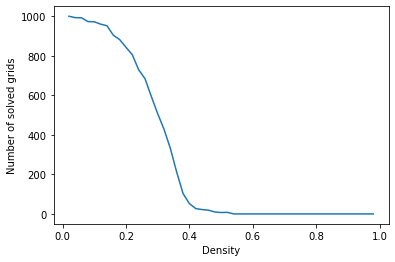

In [12]:
import matplotlib.pyplot as plt
import numpy as np
p_values = np.linspace(0,1,51)
print(p_values)
result_x = p_values[1:50]
plt.plot(result_x, my_list)
plt.xlabel('Density')
plt.ylabel('Number of solved grids')

In [ ]:
for i in np.arange(len(result_y)):
    if result_y[i]>=480 and result_y[i]<=520:
        print("p: ",result_x[i]," freq: ",result_y[i]) 

In [ ]:
result_y

In [ ]:
# import pickle
# with open('Q_4_pvssolvability.pkl','wb') as f:
#     pickle.dump(result_y, f)

In [6]:
import pickle
with open('Q_4_pvssolvability.pkl','rb') as f:
    my_list = pickle.load(f)

In [ ]:
p_values

In [2]:
import matplotlib.pyplot as plt
plt.plot(result_x, my_list)
plt.xlabel('Density')
plt.ylabel('Number of solved grids')
plt.title(' Number of solved grids vs Density of blocked cells')

NameError: name 'result_x' is not defined

In [51]:
result_x

array([0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 , 0.22,
       0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42, 0.44,
       0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64, 0.66,
       0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86, 0.88,
       0.9 , 0.92, 0.94, 0.96, 0.98])

In [52]:
my_list

[1000,
 993,
 992,
 973,
 972,
 960,
 952,
 904,
 882,
 843,
 805,
 729,
 684,
 594,
 507,
 428,
 331,
 211,
 103,
 52,
 27,
 22,
 19,
 10,
 7,
 8,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

## Question 5

Comparing heuristics - Euclidean, Manhattan, and Chebyshev.

Metric:
1. Time required to complete the grid (time)
2. Difference between the shortest path length in the whole grid and the current path
3. average number of cells processed

In [90]:
import datetime
p = 0.2
idx = np.arange(1000)
total_time_taken = []
avg_num_cells = []
shortest_path_length = []
def compute_path_length(path):
    length = 0
    for x in path:
        length = length + len(x)-1
    return length+1
with open('C:/Users/karan/Desktop/Rutgers Courses/CS520/Project1/Grid_data/'+'p'+str(p)+'.txt') as f:
    grid_data = f.readlines()
    for s in grid_data:
        i = 0
        grid = [] ## matrix that contains full knowledge of gridworld
        m = 101
        n = 101
        while(i<m*n):
            grid.append(list(s[i:i+n]))
            i = i + n
        grid = np.array(grid)
        gw = GridWorld(grid,(0,0),(100,100),101,101, grid)
        start_time = datetime.datetime.now()
        ans = gw.a_star((0,0),'c')
        end_time = datetime.datetime.now()
        if(len(ans) == 0):
            continue
        total_time_taken.append(end_time-start_time)
        avg_num_cells.append(gw.avg_num_cells_processed)
        shortest_path_length.append(len(ans))
#         path_length = compute_path_length(ans)
#         gw2 = GridWorld(grid, (0,0), (100,100), 101, 101, grid)
#         shortest_path = gw2.a_star((0,0))
#         shortest_path_length.append(len(shortest_path))

In [76]:
total_seconds = []
for x in total_time_taken:
    total_seconds.append(x.total_seconds())

In [77]:
total_seconds

[0.673693,
 0.663487,
 0.572022,
 0.672705,
 0.615088,
 0.645673,
 0.661779,
 0.61057,
 0.680636,
 0.644864,
 0.645021,
 0.670631,
 0.638799,
 0.657784,
 0.629977,
 0.596961,
 0.601242,
 0.676136,
 0.639694,
 0.640025,
 0.606514,
 0.678828,
 0.595746,
 0.622343,
 0.646423,
 0.667498,
 0.649183,
 0.61795,
 0.632244,
 0.63166,
 0.666096,
 0.630845,
 0.606384,
 0.634478,
 0.630453,
 0.606436,
 0.62831,
 0.686298,
 0.624604,
 0.657973,
 0.654724,
 0.644673,
 0.653089,
 0.611364,
 0.647646,
 0.650745,
 0.577812,
 0.665472,
 0.624671,
 0.586101,
 0.644455,
 0.63382,
 0.64428,
 0.64867,
 0.662263,
 0.64835,
 0.636418,
 0.615152,
 0.571921,
 0.608417,
 0.633874,
 0.666469,
 0.649661,
 0.628081,
 0.674854,
 0.685507,
 0.614133,
 0.655944,
 0.628437,
 0.665254,
 0.628442,
 0.669782,
 0.589922,
 0.62451,
 0.644032,
 0.632884,
 0.594943,
 0.595941,
 0.659138,
 0.655001,
 0.642506,
 0.761708,
 0.67537,
 0.647381,
 0.726098,
 0.738947,
 0.631168,
 0.665468,
 0.672776,
 0.649505,
 0.626246,
 0.651548

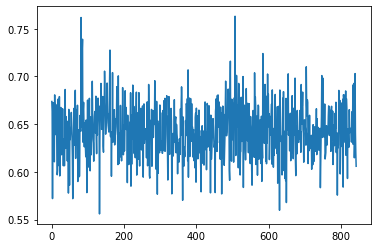

In [78]:
import matplotlib.pyplot as plt
plt.plot(total_seconds)

In [41]:
x2 = []
for i in total_seconds:
    if i<0.5:
        x2.append(i)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d2ea1fdf40>,
 'caps': [<matplotlib.lines.Line2D at 0x1d2ea20a640>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d2ea1fdbe0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d2ea20ad00>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d2ea2180a0>],
 'means': []}

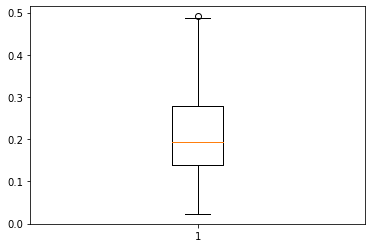

In [44]:
plt.boxplot(x2)

len(x2

In [36]:
len(x2)

78

In [67]:
# import pickle
# with open('Q_5_Euclidean_avg_num_cells.pkl','wb') as f:
#     pickle.dump(avg_num_cells, f)

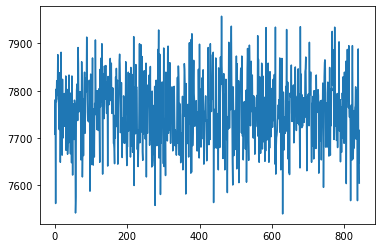

In [68]:
plt.plot(avg_num_cells)

In [53]:
# import pickle
# with open('Q_5_Manhattan_total.pkl','wb') as f:
#     pickle.dump(total_seconds, f)

In [66]:
# import pickle
# with open('Q_5_Euclidean_total.pkl','wb') as f:
#     pickle.dump(total_seconds, f)

In [54]:
# import pickle
# with open('Q_5_Manhattan_avg_num_cells.pkl','wb') as f:
#     pickle.dump(avg_num_cells, f)

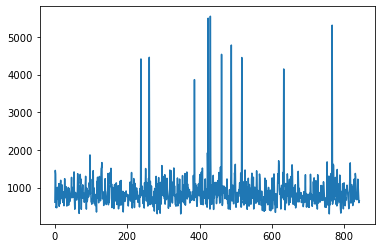

In [55]:
plt.plot(avg_num_cells)

In [56]:
# import pickle
# with open('Q_5_Manhattan_shortest_path_len.pkl','wb') as f:
#     pickle.dump(shortest_path_length, f)

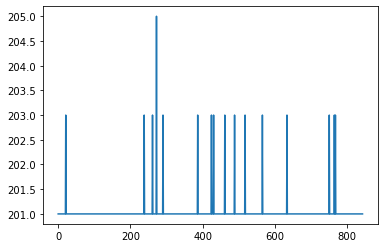

In [57]:
plt.plot(shortest_path_length)

In [69]:
with open('Q_5_Manhattan_avg_num_cells.pkl', 'rb') as f:
    mynewlist = pickle.load(f)

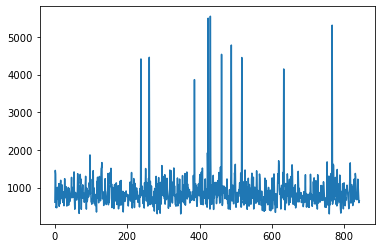

In [70]:
plt.plot(mynewlist)

In [92]:
p_values = np.linspace(0,0.3,31)

## Question-6

In [111]:
from sortedcontainers import SortedSet
from math import sqrt
## https://stackoverflow.com/questions/8875706/heapq-with-custom-compare-predicate/8875823
# Priority Queue with custom comparator
class MyPriorityQueue(object):
    # compare1 is the function that will return f(n)-> sort in ascending order of f(n)
    # compare2 is the function that will return g(n)-> sort in ascending order of g(n) if f(n) is same
    def __init__(self, current_heuristic, target):
        self.current_heuristic = current_heuristic
#         self._data = []
        self._data = SortedSet()
        self.target = target
        self.g = dict()
        self.h = dict()
    def __len__(self):
        return len(self._data)
    #### It is required to update g(n) and h(n) before pushing the node into the priority queue
    def push(self, item):
        node = (self.calculate_priority(item), self.get_heuristic(item), item)
        self._data.add(node)
#         heapq.heappush(self._data, (self.calculate_priority(item), self.get_heuristic(item), item))
    def pop(self):
        node = self._data.pop(0)[2]
        return node
#         return heapq.heappop(self._data)[2]
    def manhattan_distance(self, x, y): # Manhattan Distance -> heuristic = |x1-x2| + |y1-y2|
        return abs(x[0]-y[0])+abs(x[1]-y[1])
    def euclidean_distance(self, x, y): # Euclidean Distance -> heuristic = sqrt( (x1-x2)**2 + (y1-y2)**2 )
        return sqrt( (x[0]-x[1])**2 + (y[0]-y[1])**2 )
    def chebyshev_distance(self, x, y): # Chebyshev Distance -> heuristic = max(|x1-x2|, |y1-y2|)
        return max(abs(x[0]-x[1]), abs(y[0]-y[1]))
    def get_heuristic(self, x):  # returns the value of heuristic based on the heuristic function
        measure = self.current_heuristic
        if measure == 'm': # if h is manhattan
            self.h[x] = self.manhattan_distance(x, self.target)
        elif measure == 'e': # if h is euclidean
            self.h[x] = self.euclidean_distance(x, self.target)
        elif measure == 'c': # if c is chebyshev
            self.h[x] = self.chebyshev_distance(x, self.target)
        return self.h[x]
    def calculate_priority(self, x): # calculates priority for each cell - distance from cell to target
#         print("*******x: ",x)
#         print("self.g: ",self.g)
#         print("g: ",self.g[x])
        return self.g[x] + self.get_heuristic(x)

class GridWorld2:
    def __init__(self, grid, start, target, n, m, agent_grid = None ):
        self.n = n # denotes the number of rows
        self.m = m # denotes the number of columns
        self.start = start # denotes the start coordinate of the grid
        self.target = target # denotes the target coordinate of the grid
        self.trajectory = [] # denotes the trajectory of the agent in the grid
        self.grid = grid # denotes the full knowledge of the grid
        if agent_grid is None:
            self.agent_grid = np.full((n,n),'.')
        else:
            self.agent_grid = agent_grid
        self.sum_num_cells_processed = 0
    def a_star(self, source, current_heuristic = 'm'):
        dirx = [-1, 1, 0, 0] ## calculates the neighbours of the current node
        diry = [0, 0, 1, -1] ## calculates the neighbours of the current node
        visited = set() ## contains the nodes that have already been added in priority queue
        closed_list = set() ## contains the nodes that have been popped from priority queue
        open_list = MyPriorityQueue(current_heuristic, self.target) ## stores the visited nodes and pops it out according to it's priority
        planned_path = [] ## Stores the path that the agent has planned according to it's current knowledge
        open_list.g[source]=0
        open_list.calculate_priority( source)
        open_list.push( source) ## This function runs in O(logn)
        visited.add(source)#visited[source] = 1
        parent = {} ## stores the parent of each node that is visited
        parent[source] = None
        while(len(open_list)>0):
            curr = open_list.pop()
            if(curr in closed_list):
                continue
            self.sum_num_cells_processed = self.sum_num_cells_processed + 1
            closed_list.add(curr)
            if(curr[0] == self.target[0] and curr[1] == self.target[1]):
                break
            for i in np.arange(4):
                childx = curr[0] + dirx[i]
                childy = curr[1] + diry[i]
                child = (childx, childy)
                if(childx>=0 and childx<self.m and childy>=0 and childy<self.n and (child not in closed_list) and self.agent_grid[childx][childy]!='X'):
                    if(child not in visited):
                        visited.add(child)
                        parent[child] = curr
                        open_list.g[child] = open_list.g[curr]+1
                        open_list.calculate_priority(child)
                        open_list.push(child) #heapq.heappush(open_list, child)
                    else:
                        if open_list.g[curr]+1<open_list.g[child]:
                            parent[child] = curr
                            open_list._data.discard(child)
                            open_list.g[child] = open_list.g[curr]+1
                            open_list.calculate_priority(child)
                            open_list.push(child)
        if(self.target not in visited):
            return []
        curr = self.target
        while(curr != source):
            planned_path.append(curr)
            curr = parent[curr]
        planned_path.append(source)
        return planned_path[::-1]
    
    def check_planned_path(self, planned_path):
        dirx = [-1, 1, 0, 0]
        diry = [0, 0, -1, 1]
        n = len(planned_path)
        traversed_path = []
        for i in np.arange(n):
            currx = planned_path[i][0]
            curry = planned_path[i][1]
            if(grid[currx][curry] == 'X'):
                break
            traversed_path.append((currx,curry))
            for i in np.arange(4):
                childx = currx + dirx[i]
                childy = curry + diry[i]
                if(childx>=0 and childx<self.m and childy>=0 and childy<self.n):
                    self.agent_grid[childx][childy] = self.grid[childx][childy]
        return traversed_path
    
    ## This is the function that computes the path that repeated a-star traverses
    def compute_path(self):
        path = []
        curr = self.start
        while(curr != self.target):
            planned_path = self.a_star(curr)
            if( len(planned_path) == 0 ):
                return []
            traversed_path = self.check_planned_path(planned_path)
            n = len(traversed_path)
            path.append(traversed_path)
            if(traversed_path[n-1] == self.target):
                break
            curr = traversed_path[n-1]
        return path

In [120]:
# Density vs Average Trajectory Length
# Density vs Average (Length of Trajectory / Length of Shortest Path in Final Discovered Gridworld (FDG) )
from tqdm import tqdm
cnt = 0
p_values = np.round(p_values,2)
result_x = p_values[1:50]
avg_len_trajectory = []
avg_traj_sp_fdg = [] # Density vs Average (Length of Trajectory / Length of Shortest Path in Final Discovered Gridworld (FDG) )
avg_sp_fdg_sp_kn = [] # Average of shortest path in final discovered grid vs shortest path in known grid
avg_num_cells_a_star = []

def update_final_discovered_grid(final_discovered_grid, rep_a_trajectory, grid):
    m = len(final_discovered_grid)
    n = len(final_discovered_grid[0])
    dirx = [-1, 1, 0, 0]
    diry = [0, 0, -1, 1]
    for x in rep_a_trajectory:
        for i in np.arange(len(x)):
            pos = x[i]
            final_discovered_grid[pos[0]][pos[1]] = grid[pos[0]][pos[1]]
            for j in np.arange(4):
                childx = pos[0] + dirx[j]
                childy = pos[1] + diry[j]
                if( childx>=0 and childx<m and childy>=0 and childy<n ):
                    final_discovered_grid[childx][childy] = grid[childx][childy]
    return final_discovered_grid
def calculate_path_length(ans_compute_path):
    ans = 0
    for x in ans_compute_path:
        ans = ans + len(x)-1
    return ans + 1
for p in tqdm(p_values):
    if p == 0 or  p== 1:
        continue
    with open('C:/Users/karan/Desktop/Rutgers Courses/CS520/Project1/Grid_data_3_q6/'+'p'+str(p)+'.txt') as f:
        print('Completed for p: ',p)
        grid_data = f.readlines()
        freq = 0
        sum_traj_len = 0
        ratio1 = 0 # Length of trajectory / Length of Shortest Path in Final Discovered GridWorld
        ratio2 = 0
        sum_cell_processed = 0
        for s in grid_data:
            i = 0
            grid = [] ## matrix that contains full knowledge of gridworld
            m = 101
            n = 101
            while(i<m*n):
                grid.append(list(s[i:i+n]))
                i = i + n
            grid = np.array(grid)
            gw = GridWorld2(grid,(0,0),(100,100),101,101)
            ## Calculating trajectory length in agent's world
            rep_a_trajectory = gw.compute_path() # Length1
            reap_a_traj_len = calculate_path_length(rep_a_trajectory)
            sum_traj_len = sum_traj_len + reap_a_traj_len 
            ## Calculating trjaectory length in final discovered grid
            final_discovered_grid = np.full((101,101),'X')
            final_discovered_grid = update_final_discovered_grid(final_discovered_grid, rep_a_trajectory, grid)
            gw_final_discovered = GridWorld2(final_discovered, (0,0), (100,100), 101, 101, agent_grid = final_discovered_grid)
            shortest_path_final_discovered = gw_final_discovered.a_star((0,0),'m') #Length2
            # Graph2 ratio1 = Avg( Length1/Length2 ) vs p
            ratio1 = ratio1 + reap_a_traj_len/len(shortest_path_final_discovered)
            
            #Calculaing shortest path length in Full Known grid
            gw_full_known = GridWorld2(grid, (0,0),(100,100), 101, 101, agent_grid = grid)
            shortest_path_full_known = gw_full_known.a_star((0,0),'m')# Length3
            # Graph3 -> ratio2 = Avg(Length2/Length3) vs p
            if(len(shortest_path_full_known)==0):
                print(grid)
            ratio2 = ratio2 + len(shortest_path_final_discovered)/len(shortest_path_full_known)
            #Graph 4 -> p vs Avg cell processed
            sum_cell_processed = sum_cell_processed + gw.sum_num_cells_processed
        avg_len_trajectory.append(sum_traj_len/1000)
        avg_traj_sp_fdg.append(ratio1/1000)
        avg_sp_fdg_sp_kn.append(ratio2/1000)
        avg_num_cells_a_star.append(sum_cell_processed/1000)
        
            

  0%|                                                                                                                                                                             | 0/31 [00:00<?, ?it/s]

Completed for p:  0.01


  6%|██████████▋                                                                                                                                                          | 2/31 [00:19<04:42,  9.74s/it]

Completed for p:  0.02


 10%|███████████████▉                                                                                                                                                     | 3/31 [00:43<07:24, 15.87s/it]

Completed for p:  0.03


 13%|█████████████████████▎                                                                                                                                               | 4/31 [01:13<09:22, 20.84s/it]

Completed for p:  0.04


 16%|██████████████████████████▌                                                                                                                                          | 5/31 [01:48<11:09, 25.77s/it]

Completed for p:  0.05


 19%|███████████████████████████████▉                                                                                                                                     | 6/31 [02:27<12:35, 30.23s/it]

Completed for p:  0.06


 23%|█████████████████████████████████████▎                                                                                                                               | 7/31 [03:11<13:49, 34.56s/it]

Completed for p:  0.07


 26%|██████████████████████████████████████████▌                                                                                                                          | 8/31 [04:00<15:02, 39.22s/it]

Completed for p:  0.08


 29%|███████████████████████████████████████████████▉                                                                                                                     | 9/31 [04:54<16:07, 43.97s/it]

Completed for p:  0.09


 32%|████████████████████████████████████████████████████▉                                                                                                               | 10/31 [05:53<16:59, 48.54s/it]

Completed for p:  0.1


 35%|██████████████████████████████████████████████████████████▏                                                                                                         | 11/31 [06:56<17:39, 52.99s/it]

Completed for p:  0.11


 39%|███████████████████████████████████████████████████████████████▍                                                                                                    | 12/31 [08:06<18:19, 57.89s/it]

Completed for p:  0.12


 42%|████████████████████████████████████████████████████████████████████▊                                                                                               | 13/31 [09:18<18:42, 62.38s/it]

Completed for p:  0.13


 45%|██████████████████████████████████████████████████████████████████████████                                                                                          | 14/31 [10:35<18:52, 66.61s/it]

Completed for p:  0.14


 48%|███████████████████████████████████████████████████████████████████████████████▎                                                                                    | 15/31 [11:55<18:53, 70.85s/it]

Completed for p:  0.15


 52%|████████████████████████████████████████████████████████████████████████████████████▋                                                                               | 16/31 [13:22<18:52, 75.51s/it]

Completed for p:  0.16


 55%|█████████████████████████████████████████████████████████████████████████████████████████▉                                                                          | 17/31 [14:54<18:46, 80.48s/it]

Completed for p:  0.17


 58%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                                                    | 18/31 [21:38<38:31, 177.84s/it]

Completed for p:  0.18


 61%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                                                               | 19/31 [23:21<31:04, 155.41s/it]

Completed for p:  0.19


 65%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                         | 20/31 [25:09<25:52, 141.16s/it]

Completed for p:  0.2


 68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                                                   | 21/31 [1:17:43<2:54:13, 1045.38s/it]

Completed for p:  0.21


 71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                              | 22/31 [1:19:43<1:55:07, 767.49s/it]

Completed for p:  0.22


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                         | 23/31 [1:21:50<1:16:43, 575.39s/it]

Completed for p:  0.23


 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                    | 24/31 [1:42:11<1:29:44, 769.17s/it]

Completed for p:  0.24


 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                               | 25/31 [1:43:58<57:02, 570.45s/it]

Completed for p:  0.25


 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                          | 26/31 [1:45:51<36:05, 433.09s/it]

Completed for p:  0.26


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 27/31 [1:47:49<22:34, 338.73s/it]

Completed for p:  0.27


 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 28/31 [1:49:55<13:44, 274.99s/it]

Completed for p:  0.28


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 29/31 [1:52:12<07:46, 233.35s/it]

Completed for p:  0.29


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 30/31 [4:11:30<44:30, 2670.80s/it]

Completed for p:  0.3


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 31/31 [4:14:06<00:00, 491.84s/it]


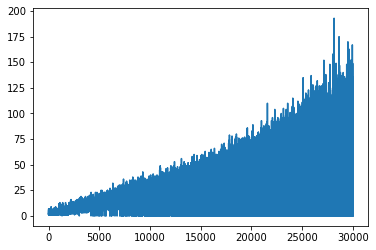

In [94]:
result_x = 

In [125]:
# import pickle
# with open('Q_6_avg_len_trajectory.pkl','wb') as f:
#     pickle.dump(avg_len_trajectory, f)
# with open('Q_6_avg_traj_sp_fdg.pkl','wb') as f:
#     pickle.dump(avg_traj_sp_fdg, f)
# with open('Q_6_avg_sp_fdg_sp_kn.pkl','wb') as f:
#     pickle.dump(avg_sp_fdg_sp_kn, f)
# with open('Q_6_avg_num_cells_a_star.pkl','wb') as f:
#     pickle.dump(avg_num_cells_a_star, f)


Text(0, 0.5, 'Average Length of Trajectory')

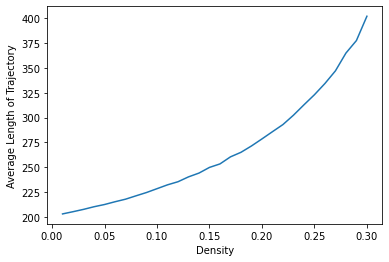

In [14]:
import matplotlib.pyplot as plt
p_values = np.linspace(0,0.3,31)
p_values = np.round(p_values,2)
result_x = p_values[1:]
with open('Q_6_avg_len_trajectory.pkl', 'rb') as f:
       avg_len_trajectory = pickle.load(f)
plt.plot(result_x, avg_len_trajectory)
plt.xlabel('Density')
plt.ylabel('Average Length of Trajectory')
# plt.title(' Average Length of Trajectory using A-star algorithm vs Density of blocked cells')

Text(0, 0.5, 'Average of Ratio')

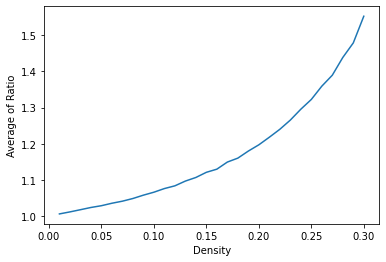

In [18]:
import matplotlib.pyplot as plt
with open('Q_6_avg_traj_sp_fdg.pkl', 'rb') as f:
       avg_traj_sp_fdg = pickle.load(f)
plt.plot(result_x, avg_traj_sp_fdg)
plt.xlabel('Density')
plt.ylabel('Average of Ratio')
# plt.title(' Average of Ratio, Ratio = (Length of Trajectory/Length of Shortest Path in Final Discovered World) vs Density of blocked cells')

Text(0.5, 1.0, ' Average of Ratio, Ratio = (Length of Trajectory/Length of Shortest Path in Final Discovered World) vs Density of blocked cells')

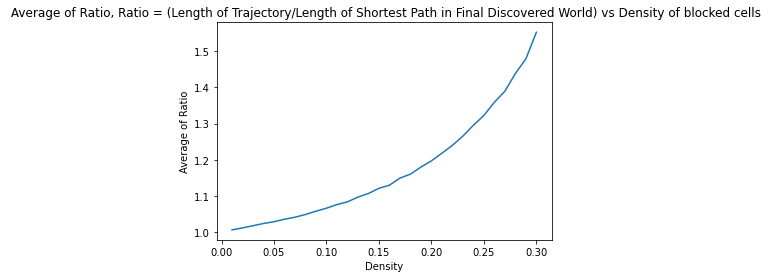

In [122]:
import matplotlib.pyplot as plt
plt.plot(result_x, avg_traj_sp_fdg)
plt.xlabel('Density')
plt.ylabel('Average of Ratio')
plt.title(' Average of Ratio, Ratio = (Length of Trajectory/Length of Shortest Path in Final Discovered World) vs Density of blocked cells')

Text(0, 0.5, 'Average of Ratio')

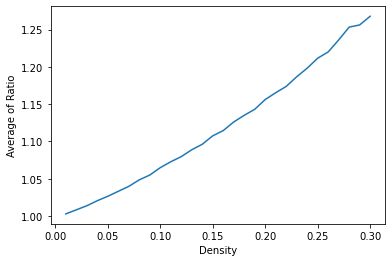

In [19]:
import matplotlib.pyplot as plt
with open('Q_6_avg_sp_fdg_sp_kn.pkl', 'rb') as f:
       avg_sp_fdg_sp_kn = pickle.load(f)
plt.plot(result_x, avg_sp_fdg_sp_kn )
plt.xlabel('Density')
plt.ylabel('Average of Ratio')
# plt.title(' Average of Ratio, Ratio = (Length of Shortest Path in Final Discovered World / Length of Shortest Path in Full GridWorld) vs Density of blocked cells)')

Text(0.5, 1.0, ' Average of Ratio, Ratio = (Length of Shortest Path in Final Discovered World / Length of Shortest Path in Full GridWorld) vs Density of blocked cells')

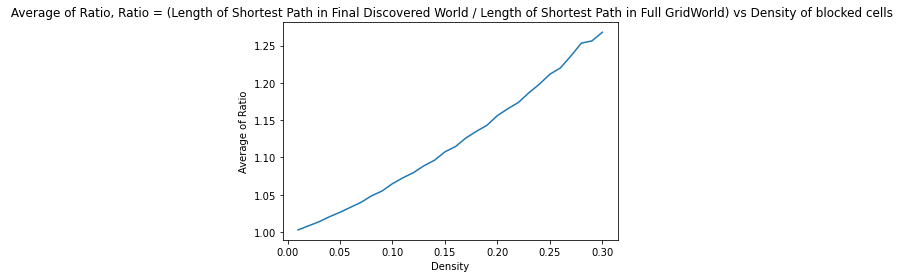

In [123]:
import matplotlib.pyplot as plt
plt.plot(result_x, avg_sp_fdg_sp_kn)
plt.xlabel('Density')
plt.ylabel('Average of Ratio')
plt.title(' Average of Ratio, Ratio = (Length of Shortest Path in Final Discovered World / Length of Shortest Path in Full GridWorld) vs Density of blocked cells')

Text(0, 0.5, 'Average Number of Cells Processed')

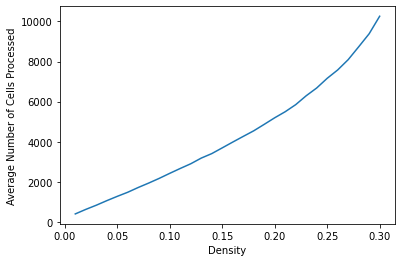

In [21]:
import matplotlib.pyplot as plt
with open('Q_6_avg_num_cells_a_star.pkl', 'rb') as f:
       avg_num_cells_a_star = pickle.load(f)
plt.plot(result_x, avg_num_cells_a_star )
plt.xlabel('Density')
plt.ylabel('Average Number of Cells Processed')
# plt.title(' Average Number of Cells Processed in A-Star Algorithm')

Text(0.5, 1.0, ' Average Number of Cells Processed in A-Star Algorithm')

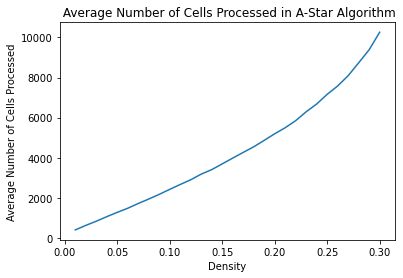

In [124]:
import matplotlib.pyplot as plt
plt.plot(result_x, avg_num_cells_a_star)
plt.xlabel('Density')
plt.ylabel('Average Number of Cells Processed')
plt.title(' Average Number of Cells Processed in A-Star Algorithm')

### Question-7 

Analyse the same data in Q6, using only one direction in the direction of attempted motion as the field of view. 

In [131]:
from sortedcontainers import SortedSet
from math import sqrt
## https://stackoverflow.com/questions/8875706/heapq-with-custom-compare-predicate/8875823
# Priority Queue with custom comparator
class MyPriorityQueue(object):
    # compare1 is the function that will return f(n)-> sort in ascending order of f(n)
    # compare2 is the function that will return g(n)-> sort in ascending order of g(n) if f(n) is same
    def __init__(self, current_heuristic, target):
        self.current_heuristic = current_heuristic
#         self._data = []
        self._data = SortedSet()
        self.target = target
        self.g = dict()
        self.h = dict()
    def __len__(self):
        return len(self._data)
    #### It is required to update g(n) and h(n) before pushing the node into the priority queue
    def push(self, item):
        node = (self.calculate_priority(item), self.get_heuristic(item), item)
        self._data.add(node)
#         heapq.heappush(self._data, (self.calculate_priority(item), self.get_heuristic(item), item))
    def pop(self):
        node = self._data.pop(0)[2]
        return node
#         return heapq.heappop(self._data)[2]
    def manhattan_distance(self, x, y): # Manhattan Distance -> heuristic = |x1-x2| + |y1-y2|
        return abs(x[0]-y[0])+abs(x[1]-y[1])
    def euclidean_distance(self, x, y): # Euclidean Distance -> heuristic = sqrt( (x1-x2)**2 + (y1-y2)**2 )
        return sqrt( (x[0]-x[1])**2 + (y[0]-y[1])**2 )
    def chebyshev_distance(self, x, y): # Chebyshev Distance -> heuristic = max(|x1-x2|, |y1-y2|)
        return max(abs(x[0]-x[1]), abs(y[0]-y[1]))
    def get_heuristic(self, x):  # returns the value of heuristic based on the heuristic function
        measure = self.current_heuristic
        if measure == 'm': # if h is manhattan
            self.h[x] = self.manhattan_distance(x, self.target)
        elif measure == 'e': # if h is euclidean
            self.h[x] = self.euclidean_distance(x, self.target)
        elif measure == 'c': # if c is chebyshev
            self.h[x] = self.chebyshev_distance(x, self.target)
        return self.h[x]
    def calculate_priority(self, x): # calculates priority for each cell - distance from cell to target
#         print("*******x: ",x)
#         print("self.g: ",self.g)
#         print("g: ",self.g[x])
        return self.g[x] + self.get_heuristic(x)

class GridWorld3:
    def __init__(self, grid, start, target, n, m, agent_grid = None ):
        self.n = n # denotes the number of rows
        self.m = m # denotes the number of columns
        self.start = start # denotes the start coordinate of the grid
        self.target = target # denotes the target coordinate of the grid
        self.trajectory = [] # denotes the trajectory of the agent in the grid
        self.grid = grid # denotes the full knowledge of the grid
        if agent_grid is None:
            self.agent_grid = np.full((n,n),'.')
        else:
            self.agent_grid = agent_grid
        self.sum_num_cells_processed = 0
    def a_star(self, source, current_heuristic = 'm'):
        dirx = [-1, 1, 0, 0] ## calculates the neighbours of the current node
        diry = [0, 0, 1, -1] ## calculates the neighbours of the current node
        visited = set() ## contains the nodes that have already been added in priority queue
        closed_list = set() ## contains the nodes that have been popped from priority queue
        open_list = MyPriorityQueue(current_heuristic, self.target) ## stores the visited nodes and pops it out according to it's priority
        planned_path = [] ## Stores the path that the agent has planned according to it's current knowledge
        open_list.g[source]=0
        open_list.calculate_priority( source)
        open_list.push( source) ## This function runs in O(logn)
        visited.add(source)#visited[source] = 1
        parent = {} ## stores the parent of each node that is visited
        parent[source] = None
        while(len(open_list)>0):
            curr = open_list.pop()
            if(curr in closed_list):
                continue
            self.sum_num_cells_processed = self.sum_num_cells_processed + 1
            closed_list.add(curr)
            if(curr[0] == self.target[0] and curr[1] == self.target[1]):
                break
            for i in np.arange(4):
                childx = curr[0] + dirx[i]
                childy = curr[1] + diry[i]
                child = (childx, childy)
                if(childx>=0 and childx<self.m and childy>=0 and childy<self.n and (child not in closed_list) and self.agent_grid[childx][childy]!='X'):
                    if(child not in visited):
                        visited.add(child)
                        parent[child] = curr
                        open_list.g[child] = open_list.g[curr]+1
                        open_list.calculate_priority(child)
                        open_list.push(child) #heapq.heappush(open_list, child)
                    else:
                        if open_list.g[curr]+1<open_list.g[child]:
                            parent[child] = curr
                            open_list._data.discard(child)
                            open_list.g[child] = open_list.g[curr]+1
                            open_list.calculate_priority(child)
                            open_list.push(child)
        if(self.target not in visited):
            return []
        curr = self.target
        while(curr != source):
            planned_path.append(curr)
            curr = parent[curr]
        planned_path.append(source)
        return planned_path[::-1]
    
    def check_planned_path(self, planned_path):
        dirx = [-1, 1, 0, 0]
        diry = [0, 0, -1, 1]
        n = len(planned_path)
        traversed_path = []
        for i in np.arange(n):
            currx = planned_path[i][0]
            curry = planned_path[i][1]
            if(self.grid[currx][curry] == 'X'):
                self
                break
            traversed_path.append((currx,curry))
#             for i in np.arange(4):
#                 childx = currx + dirx[i]
#                 childy = curry + diry[i]
#                 if(childx>=0 and childx<self.m and childy>=0 and childy<self.n):
#                     self.agent_grid[childx][childy] = self.grid[childx][childy]
        return traversed_path
    
    ## This is the function that computes the path that repeated a-star traverses
    def compute_path(self):
        path = []
        curr = self.start
        while(curr != self.target):
            planned_path = self.a_star(curr)
            if( len(planned_path) == 0 ):
                return []
            traversed_path = self.check_planned_path(planned_path)
            n = len(traversed_path)
            path.append(traversed_path)
            if(traversed_path[n-1] == self.target):
                break
            curr = traversed_path[n-1]
        return path

In [134]:
# Density vs Average Trajectory Length
# Density vs Average (Length of Trajectory / Length of Shortest Path in Final Discovered Gridworld (FDG) )
from tqdm import tqdm
cnt = 0
p_values = np.round(p_values,2)
result_x = p_values[1:50]
avg_len_trajectory = []
avg_traj_sp_fdg = [] # Density vs Average (Length of Trajectory / Length of Shortest Path in Final Discovered Gridworld (FDG) )
avg_sp_fdg_sp_kn = [] # Average of shortest path in final discovered grid vs shortest path in known grid
avg_num_cells_a_star = []

def update_final_discovered_grid(final_discovered_grid, rep_a_trajectory, grid):
    m = len(final_discovered_grid)
    n = len(final_discovered_grid[0])
    dirx = [-1, 1, 0, 0]
    diry = [0, 0, -1, 1]
    for x in rep_a_trajectory:
        for i in np.arange(len(x)):
            pos = x[i]
            final_discovered_grid[pos[0]][pos[1]] = grid[pos[0]][pos[1]]
#             for j in np.arange(4):
#                 childx = pos[0] + dirx[j]
#                 childy = pos[1] + diry[j]
#                 if( childx>=0 and childx<m and childy>=0 and childy<n ):
#                     final_discovered_grid[childx][childy] = grid[childx][childy]
    return final_discovered_grid
def calculate_path_length(ans_compute_path):
    ans = 0
    for x in ans_compute_path:
        ans = ans + len(x)-1
    return ans + 1
for p in tqdm(p_values):
    if p == 0 or  p== 1:
        continue
    with open('C:/Users/karan/Desktop/Rutgers Courses/CS520/Project1/Grid_data_3_q6/'+'p'+str(p)+'.txt') as f:
        print('Completed for p: ',p)
        grid_data = f.readlines()
        freq = 0
        sum_traj_len = 0
        ratio1 = 0 # Length of trajectory / Length of Shortest Path in Final Discovered GridWorld
        ratio2 = 0
        sum_cell_processed = 0
        for s in grid_data:
            i = 0
            grid = [] ## matrix that contains full knowledge of gridworld
            m = 101
            n = 101
            while(i<m*n):
                grid.append(list(s[i:i+n]))
                i = i + n
            grid = np.array(grid)
            gw = GridWorld3(grid,(0,0),(100,100),101,101)
            ## Calculating trajectory length in agent's world
            rep_a_trajectory = gw.compute_path() # Length1
            reap_a_traj_len = calculate_path_length(rep_a_trajectory)
            sum_traj_len = sum_traj_len + reap_a_traj_len 
            ## Calculating trjaectory length in final discovered grid
            final_discovered_grid = np.full((101,101),'X')
            final_discovered_grid = update_final_discovered_grid(final_discovered_grid, rep_a_trajectory, grid)
            gw_final_discovered = GridWorld3(final_discovered, (0,0), (100,100), 101, 101, agent_grid = final_discovered_grid)
            shortest_path_final_discovered = gw_final_discovered.a_star((0,0),'m') #Length2
            # Graph2 ratio1 = Avg( Length1/Length2 ) vs p
            ratio1 = ratio1 + reap_a_traj_len/len(shortest_path_final_discovered)
            
            #Calculaing shortest path length in Full Known grid
            gw_full_known = GridWorld3(grid, (0,0),(100,100), 101, 101, agent_grid = grid)
            shortest_path_full_known = gw_full_known.a_star((0,0),'m')# Length3
            # Graph3 -> ratio2 = Avg(Length2/Length3) vs p
            if(len(shortest_path_full_known)==0):
                print(grid)
            ratio2 = ratio2 + len(shortest_path_final_discovered)/len(shortest_path_full_known)
            #Graph 4 -> p vs Avg cell processed
            sum_cell_processed = sum_cell_processed + gw.sum_num_cells_processed
        avg_len_trajectory.append(sum_traj_len/1000)
        avg_traj_sp_fdg.append(ratio1/1000)
        avg_sp_fdg_sp_kn.append(ratio2/1000)
        avg_num_cells_a_star.append(sum_cell_processed/1000)

  0%|                                                                                                                                                                             | 0/31 [00:00<?, ?it/s]

Completed for p:  0.01


  3%|█████▏                                                                                                                                                            | 1/31 [04:16<2:08:21, 256.72s/it]


KeyboardInterrupt: 

## Weighted A-star algorithm
## Question-9
Heuristics - A-star can speed up using inadmissible heuristic or combination of heuristic

In [129]:
from sortedcontainers import SortedSet
from math import sqrt
## https://stackoverflow.com/questions/8875706/heapq-with-custom-compare-predicate/8875823
# Priority Queue with custom comparator
class MyPriorityQueue(object):
    # compare1 is the function that will return f(n)-> sort in ascending order of f(n)
    # compare2 is the function that will return g(n)-> sort in ascending order of g(n) if f(n) is same
    def __init__(self, current_heuristic, target, weight = 1):
        self.current_heuristic = current_heuristic
        self._data = SortedSet()
        self.target = target
        self.g = dict()
        self.h = dict()
        self.weight = weight
    def __len__(self):
        return len(self._data)
    #### It is required to update g(n) and h(n) before pushing the node into the priority queue
    def push(self, item):
        node = (self.calculate_priority(item), self.get_heuristic(item), item)
        self._data.add(node)
#         heapq.heappush(self._data, (self.calculate_priority(item), self.get_heuristic(item), item))
    def pop(self):
        node = self._data.pop(0)[2]
        return node
#         return heapq.heappop(self._data)[2]
    def manhattan_distance(self, x, y): # Manhattan Distance -> heuristic = |x1-x2| + |y1-y2|
        return abs(x[0]-y[0])+abs(x[1]-y[1])
    def euclidean_distance(self, x, y): # Euclidean Distance -> heuristic = sqrt( (x1-x2)**2 + (y1-y2)**2 )
        return sqrt( (x[0]-x[1])**2 + (y[0]-y[1])**2 )
    def chebyshev_distance(self, x, y): # Chebyshev Distance -> heuristic = max(|x1-x2|, |y1-y2|)
        return max(abs(x[0]-x[1]), abs(y[0]-y[1]))
    def get_heuristic(self, x):  # returns the value of heuristic based on the heuristic function
        measure = self.current_heuristic
        if measure == 'm': # if h is manhattan
            self.h[x] = self.manhattan_distance(x, self.target)
        elif measure == 'e': # if h is euclidean
            self.h[x] = self.euclidean_distance(x, self.target)
        elif measure == 'c': # if c is chebyshev
            self.h[x] = self.chebyshev_distance(x, self.target)
        return self.h[x]
    def calculate_priority(self, x): # calculates priority for each cell - distance from cell to target
#         print("*******x: ",x)
#         print("self.g: ",self.g)
#         print("g: ",self.g[x])
        return self.g[x] + self.weight*self.get_heuristic(x)

class GridWorld4:
    def __init__(self, grid, start, target, n, m, agent_grid = None, weight = 1 ):
        self.n = n # denotes the number of rows
        self.m = m # denotes the number of columns
        self.start = start # denotes the start coordinate of the grid
        self.target = target # denotes the target coordinate of the grid
        self.trajectory = [] # denotes the trajectory of the agent in the grid
        self.grid = grid # denotes the full knowledge of the grid
        if agent_grid is None:
            self.agent_grid = np.full((n,n),'.')
        else:
            self.agent_grid = agent_grid
        self.sum_num_cells_processed = 0
        self.weight = weight
    def a_star(self, source, current_heuristic = 'm'):
        dirx = [-1, 1, 0, 0] ## calculates the neighbours of the current node
        diry = [0, 0, 1, -1] ## calculates the neighbours of the current node
        visited = set() ## contains the nodes that have already been added in priority queue
        closed_list = set() ## contains the nodes that have been popped from priority queue
        open_list = MyPriorityQueue(current_heuristic, self.target, weight = self.weight) ## stores the visited nodes and pops it out according to it's priority
        planned_path = [] ## Stores the path that the agent has planned according to it's current knowledge
        open_list.g[source]=0
        open_list.calculate_priority( source)
        open_list.push( source) ## This function runs in O(logn)
        visited.add(source)#visited[source] = 1
        parent = {} ## stores the parent of each node that is visited
        parent[source] = None
        while(len(open_list)>0):
            curr = open_list.pop()
            if(curr in closed_list):
                continue
            self.sum_num_cells_processed = self.sum_num_cells_processed + 1
            closed_list.add(curr)
            if(curr[0] == self.target[0] and curr[1] == self.target[1]):
                break
            for i in np.arange(4):
                childx = curr[0] + dirx[i]
                childy = curr[1] + diry[i]
                child = (childx, childy)
                if(childx>=0 and childx<self.m and childy>=0 and childy<self.n and (child not in closed_list) and self.agent_grid[childx][childy]!='X'):
                    if(child not in visited):
                        visited.add(child)
                        parent[child] = curr
                        open_list.g[child] = open_list.g[curr]+1
                        open_list.calculate_priority(child)
                        open_list.push(child) #heapq.heappush(open_list, child)
                    else:
                        if open_list.g[curr]+1<open_list.g[child]:
                            parent[child] = curr
                            open_list._data.discard(child)
                            open_list.g[child] = open_list.g[curr]+1
                            open_list.calculate_priority(child)
                            open_list.push(child)
        if(self.target not in visited):
            return []
        curr = self.target
        while(curr != source):
            planned_path.append(curr)
            curr = parent[curr]
        planned_path.append(source)
        return planned_path[::-1]
    
    def check_planned_path(self, planned_path):
        dirx = [-1, 1, 0, 0]
        diry = [0, 0, -1, 1]
        n = len(planned_path)
        traversed_path = []
        for i in np.arange(n):
            currx = planned_path[i][0]
            curry = planned_path[i][1]
            if(grid[currx][curry] == 'X'):
                break
            traversed_path.append((currx,curry))
            for i in np.arange(4):
                childx = currx + dirx[i]
                childy = curry + diry[i]
                if(childx>=0 and childx<self.m and childy>=0 and childy<self.n):
                    self.agent_grid[childx][childy] = self.grid[childx][childy]
        return traversed_path
    
    ## This is the function that computes the path that repeated a-star traverses
    def compute_path(self):
        path = []
        curr = self.start
        while(curr != self.target):
            planned_path = self.a_star(curr)
            if( len(planned_path) == 0 ):
                return []
            traversed_path = self.check_planned_path(planned_path)
            n = len(traversed_path)
            path.append(traversed_path)
            if(traversed_path[n-1] == self.target):
                break
            curr = traversed_path[n-1]
        return path

In [ ]:
# Density vs Average Trajectory Length
# Density vs Average (Length of Trajectory / Length of Shortest Path in Final Discovered Gridworld (FDG) )
cnt = 0
p_values = np.round(p_values,2)
result_x = p_values[1:50]
avg_len_trajectory = []
avg_traj_sp_fdg = [] # Density vs Average (Length of Trajectory / Length of Shortest Path in Final Discovered Gridworld (FDG) )
avg_sp_fdg_sp_kn = [] # Average of shortest path in final discovered grid vs shortest path in known grid
avg_num_cells_a_star = []

def update_final_discovered_grid(final_discovered_grid, rep_a_trajectory, grid):
    m = len(final_discovered_grid)
    n = len(final_discovered_grid[0])
    dirx = [-1, 1, 0, 0]
    diry = [0, 0, -1, 1]
    for x in rep_a_trajectory:
        for i in np.arange(len(x)):
            pos = x[i]
            final_discovered_grid[pos[0]][pos[1]] = grid[pos[0]][pos[1]]
            for j in np.arange(4):
                childx = pos[0] + dirx[j]
                childy = pos[1] + diry[j]
                if( childx>=0 and childx<m and childy>=0 and childy<n ):
                    final_discovered_grid[childx][childy] = grid[childx][childy]
    return final_discovered_grid
def calculate_path_length(ans_compute_path):
    ans = 0
    for x in ans_compute_path:
        ans = ans + len(x)-1
    return ans + 1
for p in tqdm(p_values):
    if p == 0 or  p== 1:
        continue
    with open('C:/Users/karan/Desktop/Rutgers Courses/CS520/Project1/Grid_data_3_q6/'+'p'+str(p)+'.txt') as f:
        print('Completed for p: ',p)
        grid_data = f.readlines()
        freq = 0
        sum_traj_len = 0
        ratio1 = 0 # Length of trajectory / Length of Shortest Path in Final Discovered GridWorld
        ratio2 = 0
        sum_cell_processed = 0
        for s in grid_data:
            i = 0
            grid = [] ## matrix that contains full knowledge of gridworld
            m = 101
            n = 101
            while(i<m*n):
                grid.append(list(s[i:i+n]))
                i = i + n
            grid = np.array(grid)
            gw = GridWorld3(grid,(0,0),(100,100),101,101)
            ## Calculating trajectory length in agent's world
            rep_a_trajectory = gw.compute_path() # Length1
            reap_a_traj_len = calculate_path_length(rep_a_trajectory)
            sum_traj_len = sum_traj_len + reap_a_traj_len 
            ## Calculating trjaectory length in final discovered grid
            final_discovered_grid = np.full((101,101),'X')
            final_discovered_grid = update_final_discovered_grid(final_discovered_grid, rep_a_trajectory, grid)
            gw_final_discovered = GridWorld3(final_discovered, (0,0), (100,100), 101, 101, agent_grid = final_discovered_grid)
            shortest_path_final_discovered = gw_final_discovered.a_star((0,0),'m') #Length2
            # Graph2 ratio1 = Avg( Length1/Length2 ) vs p
            ratio1 = ratio1 + reap_a_traj_len/len(shortest_path_final_discovered)
            
            #Calculaing shortest path length in Full Known grid
            gw_full_known = GridWorld3(grid, (0,0),(100,100), 101, 101, agent_grid = grid)
            shortest_path_full_known = gw_full_known.a_star((0,0),'m')# Length3
            # Graph3 -> ratio2 = Avg(Length2/Length3) vs p
            if(len(shortest_path_full_known)==0):
                print(grid)
            ratio2 = ratio2 + len(shortest_path_final_discovered)/len(shortest_path_full_known)
            #Graph 4 -> p vs Avg cell processed
            sum_cell_processed = sum_cell_processed + gw.sum_num_cells_processed
        avg_len_trajectory.append(sum_traj_len/1000)
        avg_traj_sp_fdg.append(ratio1/1000)
        avg_sp_fdg_sp_kn.append(ratio2/1000)
        avg_num_cells_a_star.append(sum_cell_processed/1000)